[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



(a) Pie flavor; (b) weight; (c) amount of pie slices; (d) temperature.

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

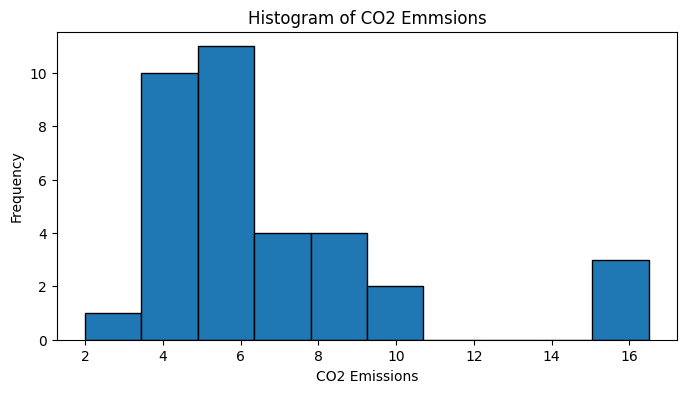

In [2]:
plt.figure(figsize=(8, 4))
plt.hist(carbon_west['CO2'], bins=10, edgecolor='black')
plt.title(f'Histogram of CO2 Emmsions')
plt.xlabel("CO2 Emissions")
plt.ylabel('Frequency')
plt.show()

Part b. Find the mean, median, and standard deviation.

In [3]:
import numpy as np

mean = np.mean(carbon_west['CO2'])
median = np.median(carbon_west['CO2'])
deviation = np.std(carbon_west['CO2'])

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {deviation}")

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [4]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [5]:
no_dc = murders['murder'][murders['state'] != 'DC']

mean = np.mean(no_dc)
deviation = np.std(no_dc)

print(f"Mean: {mean}")
print(f"Standard Deviation: {deviation}")

Mean: 4.874
Standard Deviation: 2.560297638947472


Part b. Find the five-number  summary without D.C.

In [6]:
minimum = np.min(no_dc)
q1 = np.percentile(no_dc, 25)
median = np.median(no_dc)
q3 = np.percentile(no_dc, 75)
maximum = np.max(no_dc)

print(f"Minimum: {minimum}")
print(f"Q1: {q1}")
print(f"Median: {median}")
print(f"Q3: {q3}")
print(f"Maximum: {maximum}")

Minimum: 1.0
Q1: 2.625
Median: 4.85
Q3: 6.175
Maximum: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [7]:
dc_mean = np.mean(murders['murder'])
dc_minimum = np.min(murders['murder'])
dc_q1 = np.percentile(murders['murder'], 25)
dc_median = np.median(murders['murder'])
dc_q3 = np.percentile(murders['murder'], 75)
dc_maximum = np.max(murders['murder'])

print(f"Mean: {dc_mean}")
print(f"Minimum: {dc_minimum}")
print(f"Q1: {dc_q1}")
print(f"Median: {dc_median}")
print(f"Q3: {dc_q3}")
print(f"Maximum: {dc_maximum}")

Mean: 5.252941176470588
Minimum: 1.0
Q1: 2.6500000000000004
Median: 5.0
Q3: 6.45
Maximum: 24.2


The mean and range were more affected than the median and inter-quartile range.

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [8]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home.

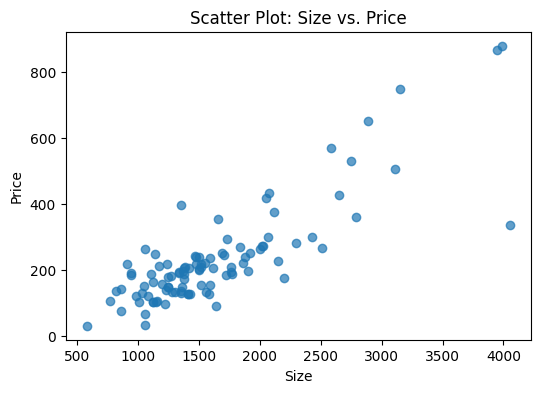

In [9]:
plt.figure(figsize=(6, 4))
plt.scatter(houses['size'], houses['price'], alpha=0.7)
plt.title('Scatter Plot: Size vs. Price')
plt.xlabel('Size')
plt.ylabel('Price')

plt.show()

Part b. Find the correlation between the two variables.

In [10]:
correlation = houses['size'].corr(houses['price'])

print(f'Correlation between Size and Price: {correlation}')

Correlation between Size and Price: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

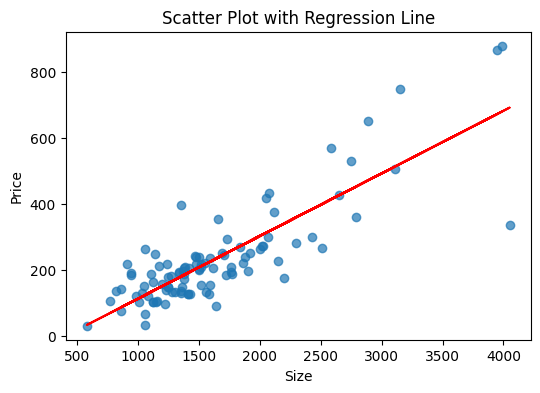

In [11]:
from sklearn.linear_model import LinearRegression

x = houses[['size']]
y = houses['price']

model = LinearRegression()
model.fit(x, y)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7)

plt.plot(x, model.predict(x), color='red')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

<Figure size 800x600 with 0 Axes>

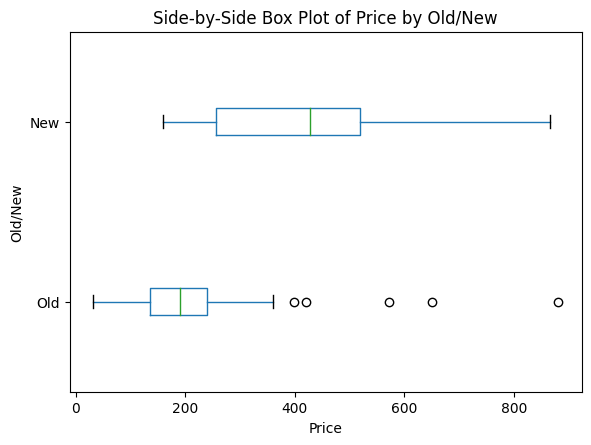

In [12]:
plt.figure(figsize=(8, 6))
houses.boxplot(column='price', by='new', vert=False,grid = False)
plt.yticks([1, 2], ['Old', 'New'])
plt.title('Side-by-Side Box Plot of Price by Old/New')
plt.suptitle('')
plt.xlabel('Price')
plt.ylabel('Old/New')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

The corrlaton coeeficent between size and price is high, so they have a strong positive correlation. The scatter plot also shows a fairly clear positive path, futher proving that this is the case. The box plot for new houses is farther to the side with higher numbers, showing that newer houses tend to have a higher price.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [13]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep='\s+')

In [14]:
pd.crosstab(happy["happiness"],happy["marital"])


marital,1,2,3
happiness,,,
1,432,92,124
2,504,282,409
3,61,103,135
